In [ ]:
!mamba upgrade -y pymolpro

In [66]:
import pymolpro
import pandas as pd

In [67]:
backend = 'local' 
project_name = 'WCPT18_methodtest'
parallel = 8

In [68]:
methods = {"HF": "hf",
"MP2": "mp2",
"MP3": "mp3",
"MP4": "mp4",
"PAPT2":"PAPT;MP2",
"PAPT3":"PAPT;MP3",
"PAPT4":"PAPT;MP4",
"CCSD":"CCSD",
"CCSD(T)":"CCSD(T)" }
bases = ['cc-pVDZ','cc-pVTZ']

In [69]:
db = pymolpro.database.load("GMTKN55_WCPT18")

In [70]:
small=db.subset(open_shell=False,max_electrons=30)
print(small)

GMTKN55 WCPT18 (closed shell only) (maximum number of electrons 30):

Molecules:
ts5: {'geometry': '8\n \n C -0.077016 0.551986 0.027408\n H -0.238295 1.625354 0.118269\n C 1.139606 -0.193208 -0.031496\n H 1.355044 -0.698094 0.908034\n H -0.073907 -1.134900 -0.245811\n H 2.028949 0.223228 -0.494171\n N -1.065094 -0.300004 -0.078808\n H -1.991673 -0.068229 0.289860\n', 'description': 'ts5'}
ts2: {'geometry': '6\n \n C 0.000000 0.509558 0.000000\n H 0.037758 1.595479 0.000000\n O -1.099586 -0.147769 0.000000\n H 1.969129 -0.087220 0.000000\n H -0.131827 -1.064473 0.000000\n N 0.988804 -0.331283 0.000000\n', 'description': 'ts2'}
ts3: {'geometry': '7\n \n C -0.110274 0.529476 0.046417\n H -0.295808 1.601222 0.124294\n O -1.106394 -0.268578 -0.020297\n C 1.104116 -0.175658 -0.047198\n H 1.271359 -0.824225 0.811942\n H -0.098402 -1.028334 -0.338969\n H 2.01095         0.277049 -0.430205\n', 'description': 'ts3'}
ts4: {'geometry': '7\n \n C 0.000000 0.000000 0.523306\n H 0.000000 0.000000 1.

In [71]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small, methods[method], basis, location=project_name,
                                                       backend=backend,
                                                       preamble="core,small", parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)    

{'HF': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f087a920f40>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f09014aa5f0>}, 'MP2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f090c4d8b50>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f08587009a0>}, 'MP3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f090151d540>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f090150ece0>}, 'MP4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f087a903af0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f0900805300>}, 'PAPT2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f08e3fd69b0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f0900806fe0>}, 'PAPT3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f0900a13e20>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f0900805120>}, 'PAPT4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f09008063b0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f08e3fa7940>}, 'CCSD':

In [72]:
analyse=pymolpro.database.analyse([result['cc-pVTZ'] for result in results.values()],db)
analyse['reaction statistics']

,HF/cc-pVTZ,MP2/cc-pVTZ,MP3/cc-pVTZ,MP4/cc-pVTZ,PAPT;MP2/cc-pVTZ,PAPT;MP3/cc-pVTZ,PAPT;MP4/cc-pVTZ,CCSD/cc-pVTZ,CCSD(T)/cc-pVTZ
MAD,0.024625,0.002931,0.006630,0.002418,0.006033,0.006008,0.000507,0.005344,0.000502
MAXD,0.038738,0.003974,0.009090,0.004060,0.009355,0.009056,0.000807,0.010078,0.000889
RMSD,0.025433,0.003199,0.006744,0.002725,0.006224,0.006173,0.000582,0.005757,0.000580
MSD,0.024625,-0.002931,0.006630,-0.002418,0.006033,0.006008,0.000296,0.005344,-0.000123
STDEVD,0.006964,0.001406,0.001355,0.001377,0.001677,0.001550,0.000549,0.002346,0.000621


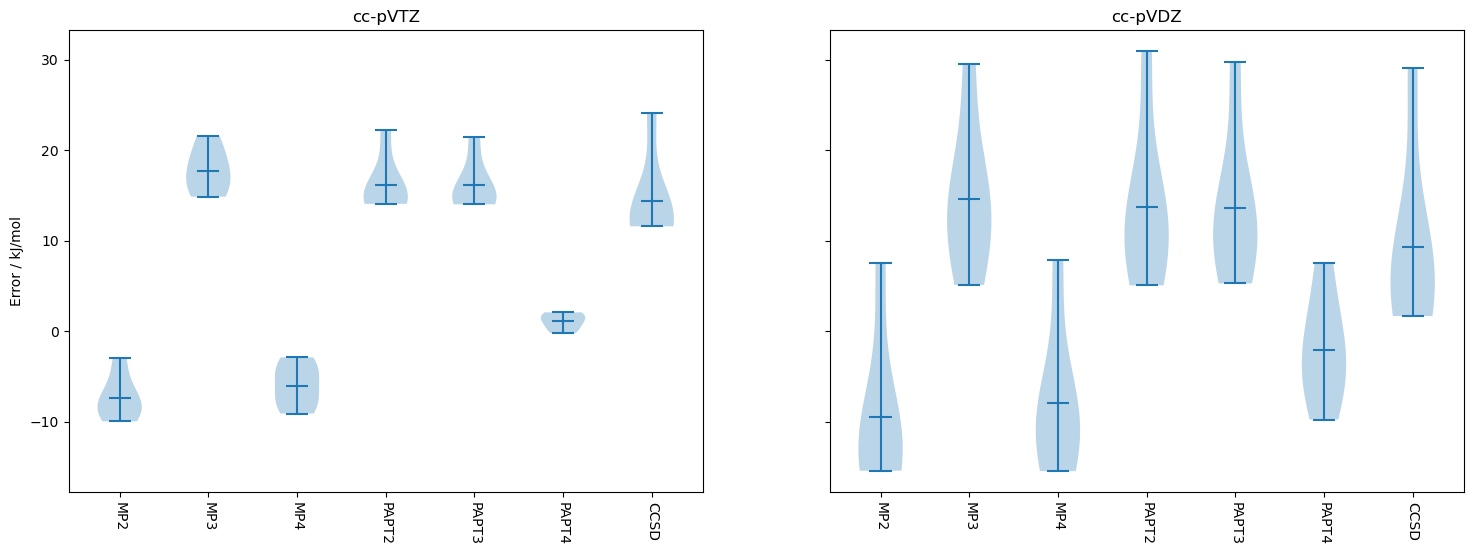

In [76]:
import matplotlib.pyplot as plt

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['cc-pVTZ', 'cc-pVDZ']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['cc-pVTZ'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")
df = pd.DataFrame(data)
df.to_excel("PAPT.xlsx")


In [75]:
extrapolate=pymolpro.database.basis_extrapolate(results[method].values(), results["HF"].values())
extrapolate